<a href="https://colab.research.google.com/github/vmadalasa/EVAConsolidated/blob/master/EVAS13/AssignmentB_YOLO3/MadhuYoloV3_final_MVEVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 45.47 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.1+cu101 _CudaDeviceProperties(name='Tesla P4', major=6, minor=1, total_memory=7611MB, multi_processor_count=20)


In [ ]:
ls

gdrive/  sample_data/  YoloV3/


In [ ]:
cd YoloV3/

/content/YoloV3


In [ ]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png


In [ ]:

root_path = '/content/gdrive/My Drive/Assignment13/files'



In [ ]:
#!mkdir /content/YoloV3/weights
!cp '/content/gdrive/My Drive/Assignment13/files/yolov3-spp-ultralytics.pt' /content/YoloV3/weights

mkdir: cannot create directory ‘/content/YoloV3/weights’: File exists


In [ ]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

2020-07-05 02:11:57.966753: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 5792.44it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 117.87it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 7198.05it/s]

In [ ]:
!rm -r /content/YoloV3/data/customdata/*
!mkdir /content/YoloV3/data/customdata/images
!mkdir /content/YoloV3/data/customdata/images/test
!mkdir /content/YoloV3/data/customdata/images/train
!mkdir /content/YoloV3/data/customdata/labels
!mkdir /content/YoloV3/data/customdata/labels/test
!mkdir /content/YoloV3/data/customdata/labels/train
!ls /content/YoloV3/data/customdata/

images	labels


In [ ]:
!gsutil -m cp '/content/gdrive/My Drive/Assignment13/files/images/train/*' /content/YoloV3/data/customdata/images/
!gsutil -m cp '/content/gdrive/My Drive/Assignment13/files/images/test/*' /content/YoloV3/data/customdata/images/

Copying file:///content/gdrive/My Drive/Assignment13/files/images/train/image-237.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/train/image-258.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/train/image-256.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/train/image-200.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/train/image-178.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/train/image-190.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/train/image-159.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/train/image-239.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/train/image-204.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/train/image-175.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/train/image-238.jpg...
Copying file:///conte

In [ ]:

!gsutil -m cp '/content/gdrive/My Drive/Assignment13/files/images/test/*' /content/YoloV3/data/customdata/images/test
!gsutil -m cp '/content/gdrive/My Drive/Assignment13/files/images/train/*' /content/YoloV3/data/customdata/images/train
!gsutil -m cp '/content/gdrive/My Drive/Assignment13/files/images/train_in/*' /content/YoloV3/data/customdata/images/train
!gsutil -m cp '/content/gdrive/My Drive/Assignment13/files/images/train_in/*' /content/YoloV3/data/customdata/images/test

!gsutil -m cp '/content/gdrive/My Drive/Assignment13/files/labels/test/*' /content/YoloV3/data/customdata/labels/test
!gsutil -m cp '/content/gdrive/My Drive/Assignment13/files/labels/train/*' /content/YoloV3/data/customdata/labels/train
!gsutil -m cp '/content/gdrive/My Drive/Assignment13/files/labels/train_in/*' /content/YoloV3/data/customdata/labels/train

!gsutil -m cp '/content/gdrive/My Drive/Assignment13/files/custom*' /content/YoloV3/data/customdata/

!gsutil  cp '/content/gdrive/My Drive/Assignment13/files/yolov3-spp_custom.cfg' /content/YoloV3/cfg/

!gsutil -m cp '/content/gdrive/My Drive/Assignment13/files/images/train_in/*' /content/YoloV3/data/customdata/images/


Copying file:///content/gdrive/My Drive/Assignment13/files/images/test/image-451.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/test/image-419.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/test/image-475.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/test/image-436.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/test/image-442.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/test/image-432.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/test/image-421.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/test/image-438.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/test/image-453.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/test/image-440.jpg...
Copying file:///content/gdrive/My Drive/Assignment13/files/images/test/image-422.jpg...
Copying file:///content/gdrive/M

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-spp_custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-spp_custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

2020-07-05 02:19:26.338431: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (495 found, 0 missing, 0 empty, 0 duplicate, for 495 images): 100% 495/495 [00:00<00:00, 10184.39it/s]
Caching images (0.3GB): 100% 495/495 [00:05<00:00, 96.45it/s]
Reading image shapes: 100% 495/495 [00:00<00:00, 7107.82it/s]
Caching labels (495 found, 0 missi

In [ ]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/495 data/customdata/images/image-001.jpg: 320x512 1 Guitars, Done. (0.029s)
image 2/495 data/customdata/images/image-002.jpg: 320x512 2 Guitars, Done. (0.029s)
image 3/495 data/customdata/images/image-00244.jpg: 320x512 1 Guitars, Done. (0.028s)
image 4/495 data/customdata/images/image-003.jpg: 320x512 1 Guitars, Done. (0.027s)
image 5/495 data/customdata/images/image-00330.jpg: 320x512 1 Guitars, Done. (0.028s)
image 6/495 data/customdata/images/image-004.jpg: 320x512 2 Guitars, Done. (0.027s)
image 7/495 data/cus

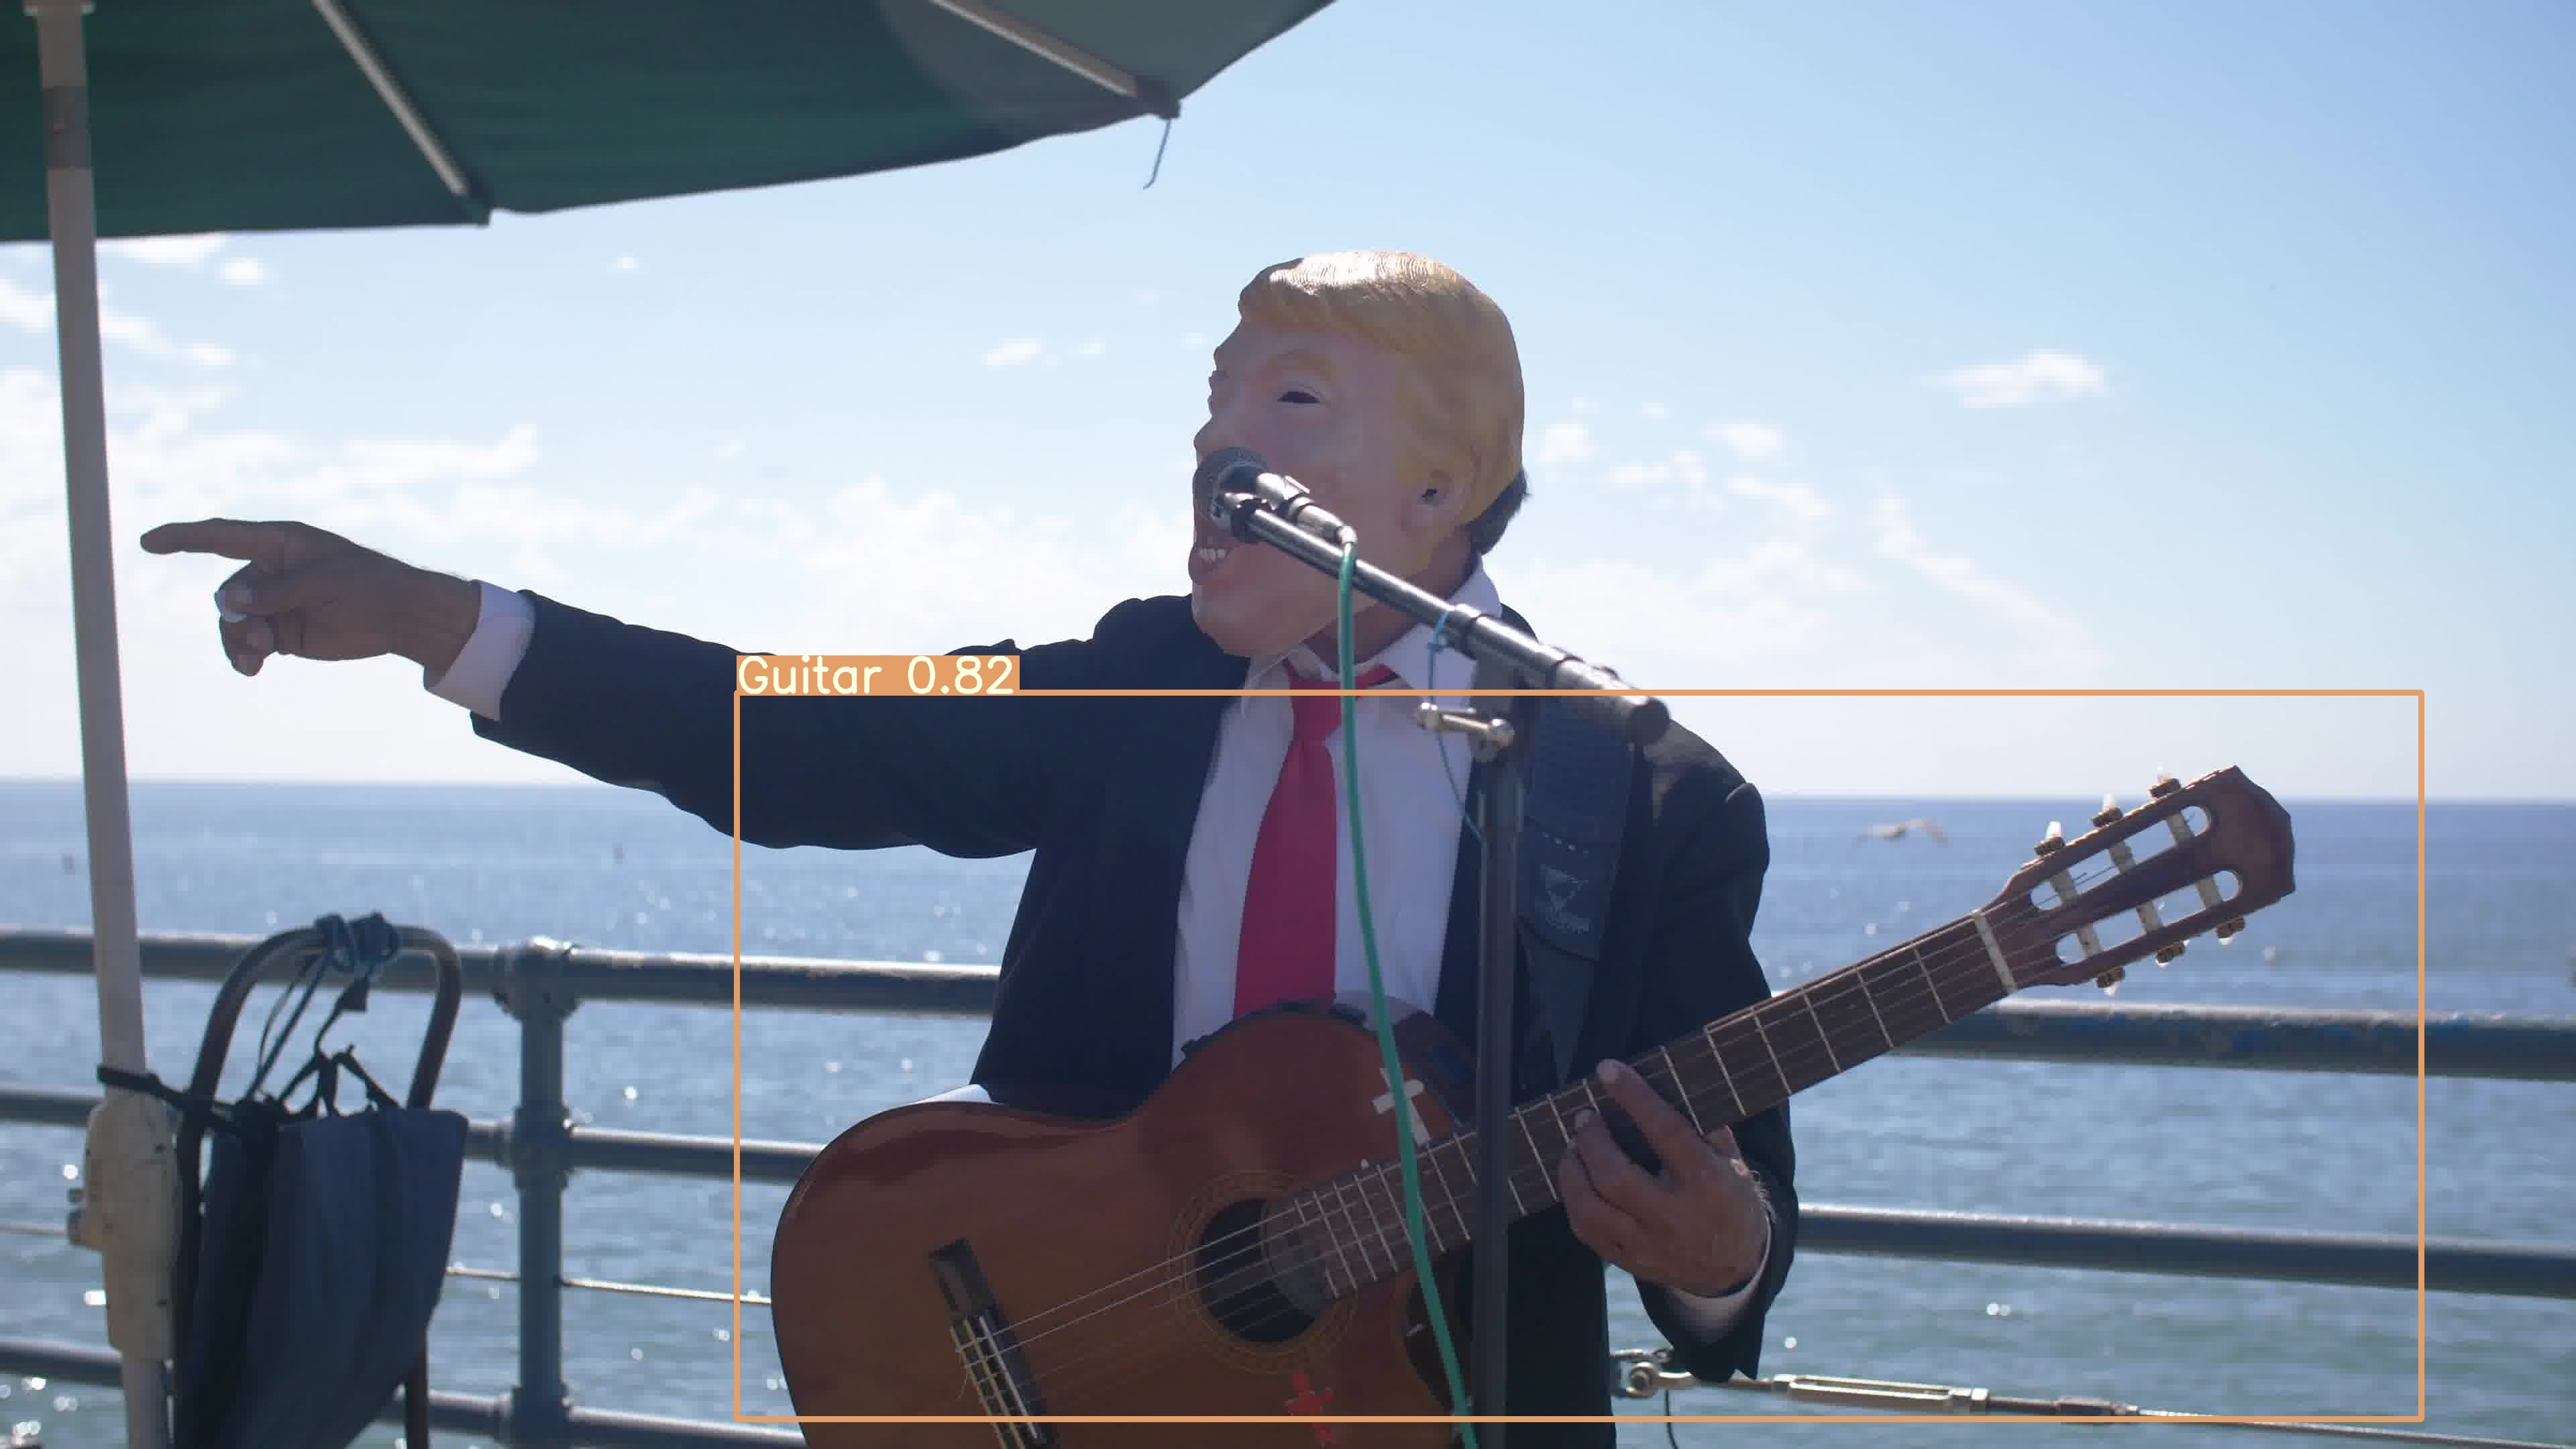

In [ ]:
Image(filename='out_out/image-00441.jpg', width=600)

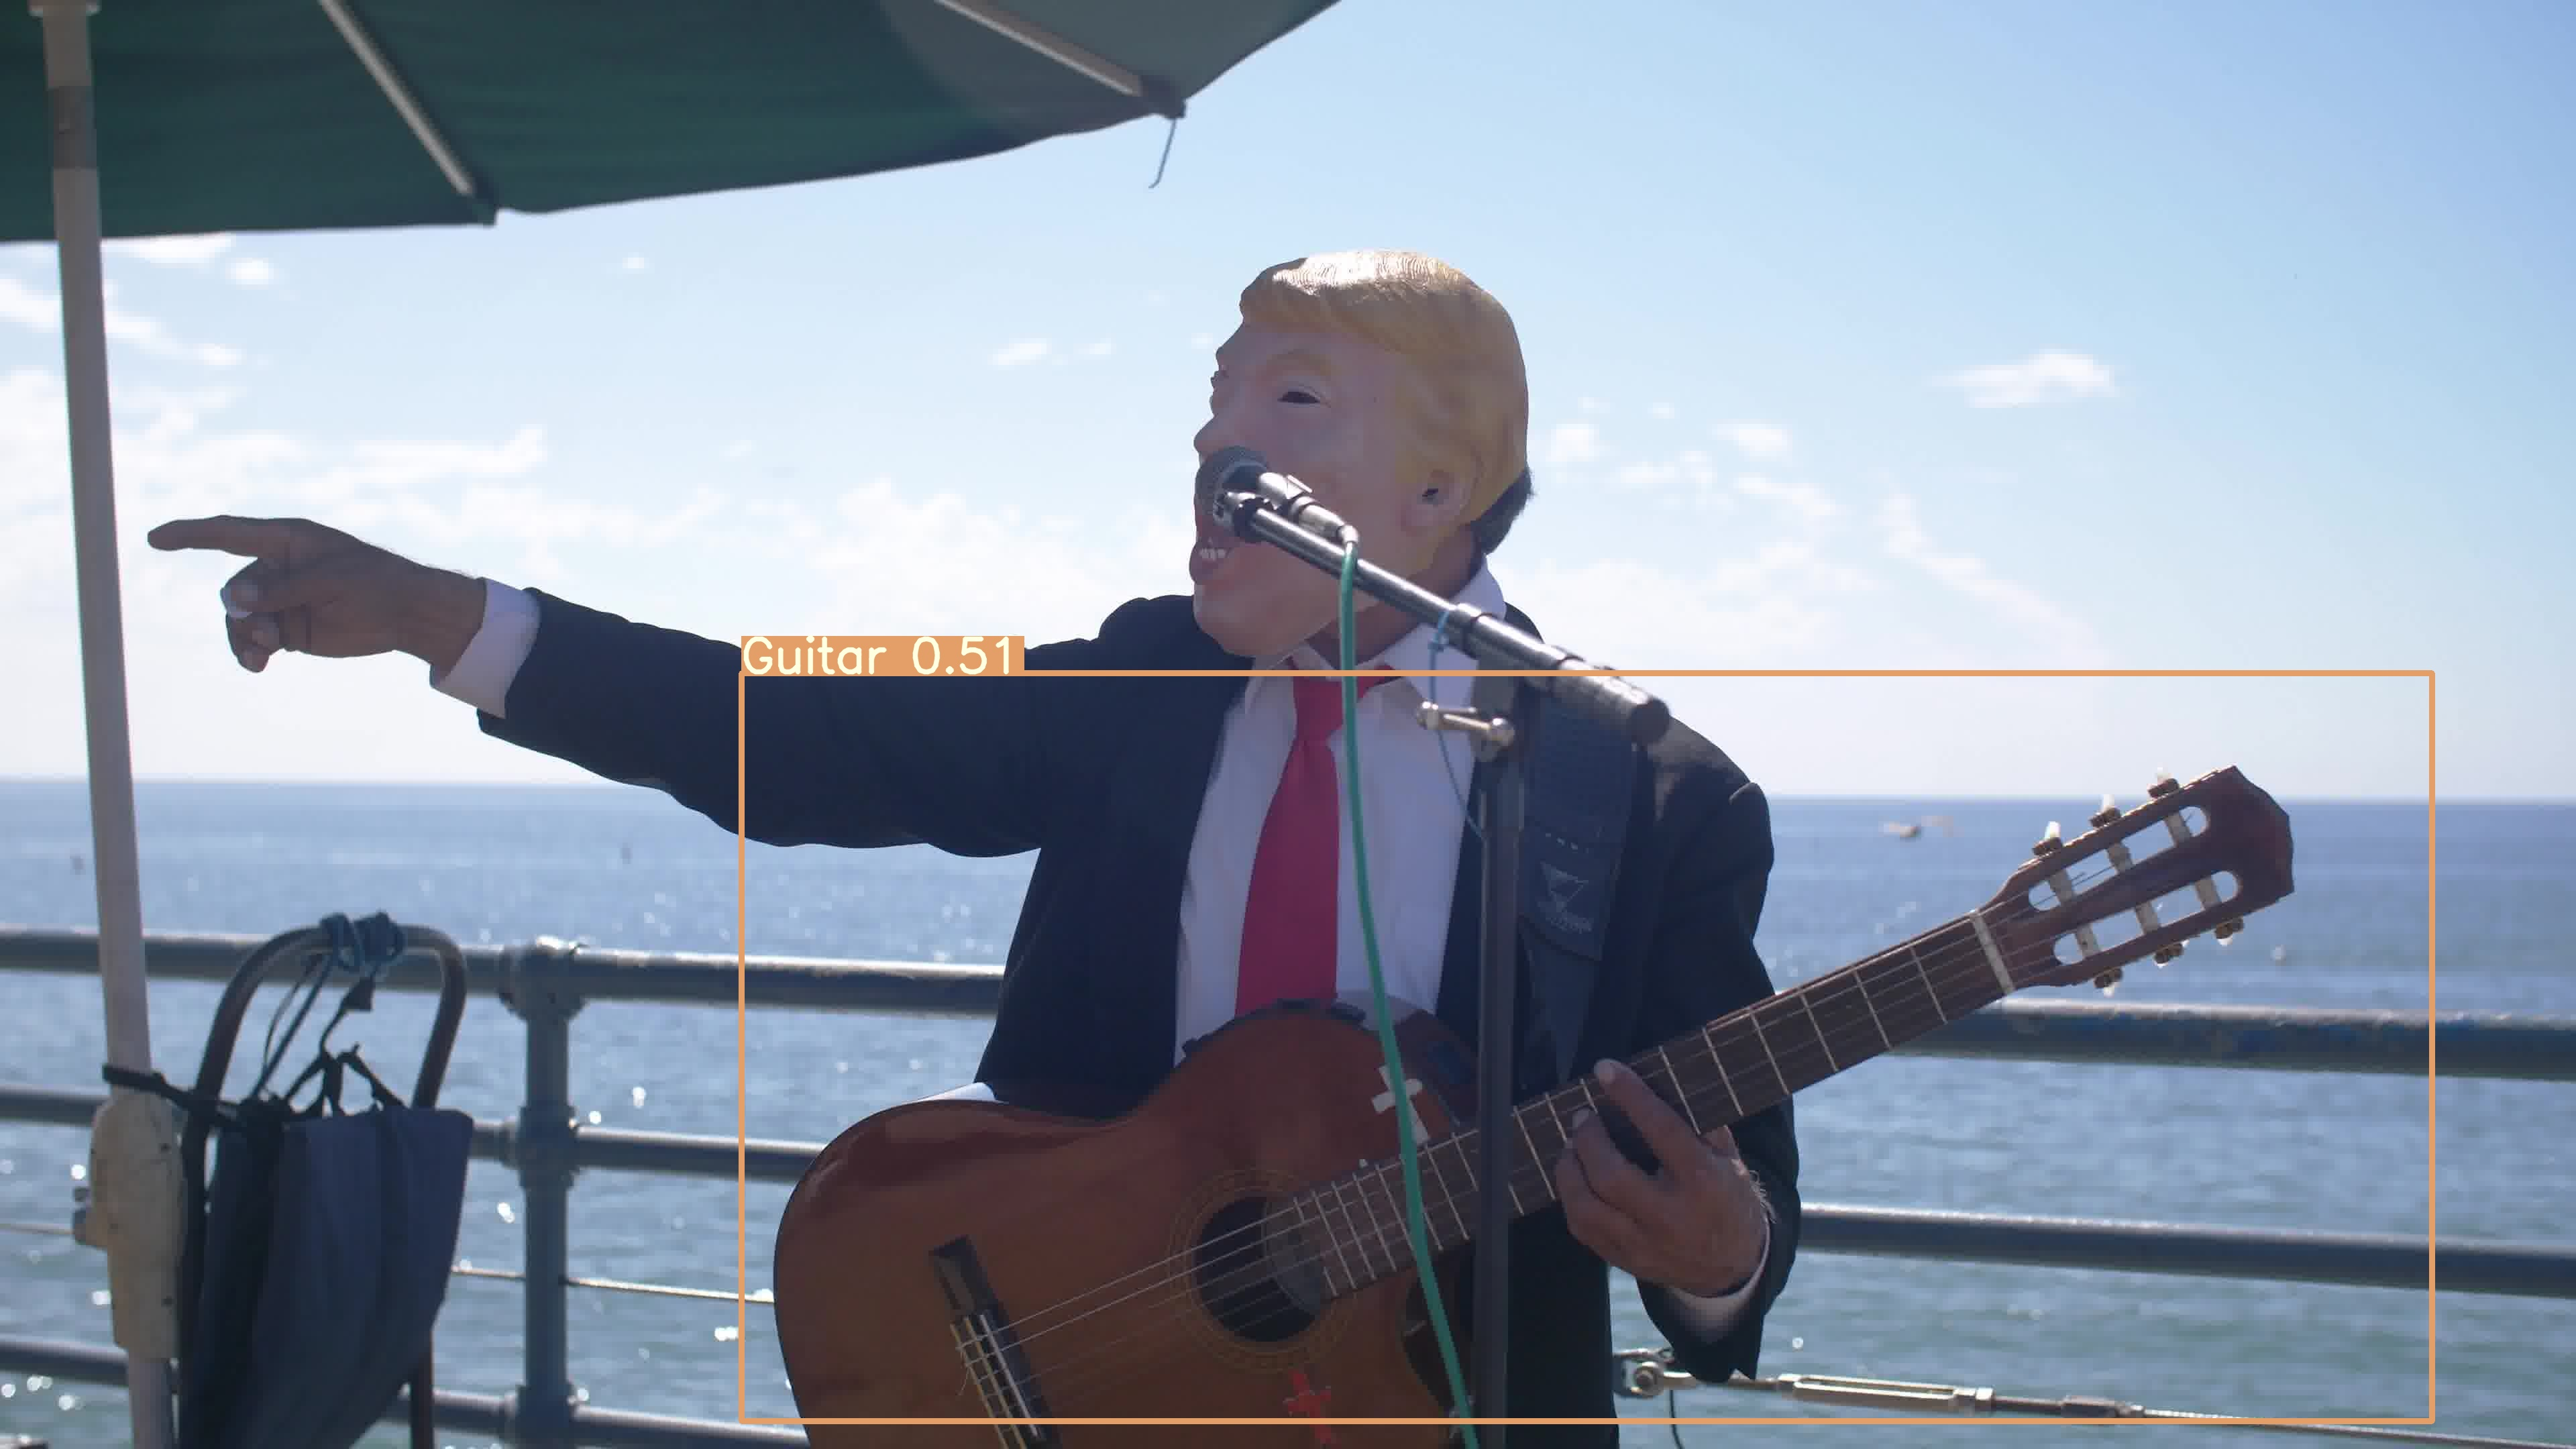

In [ ]:
Image(filename='out_out/image-00442.jpg', width=600)

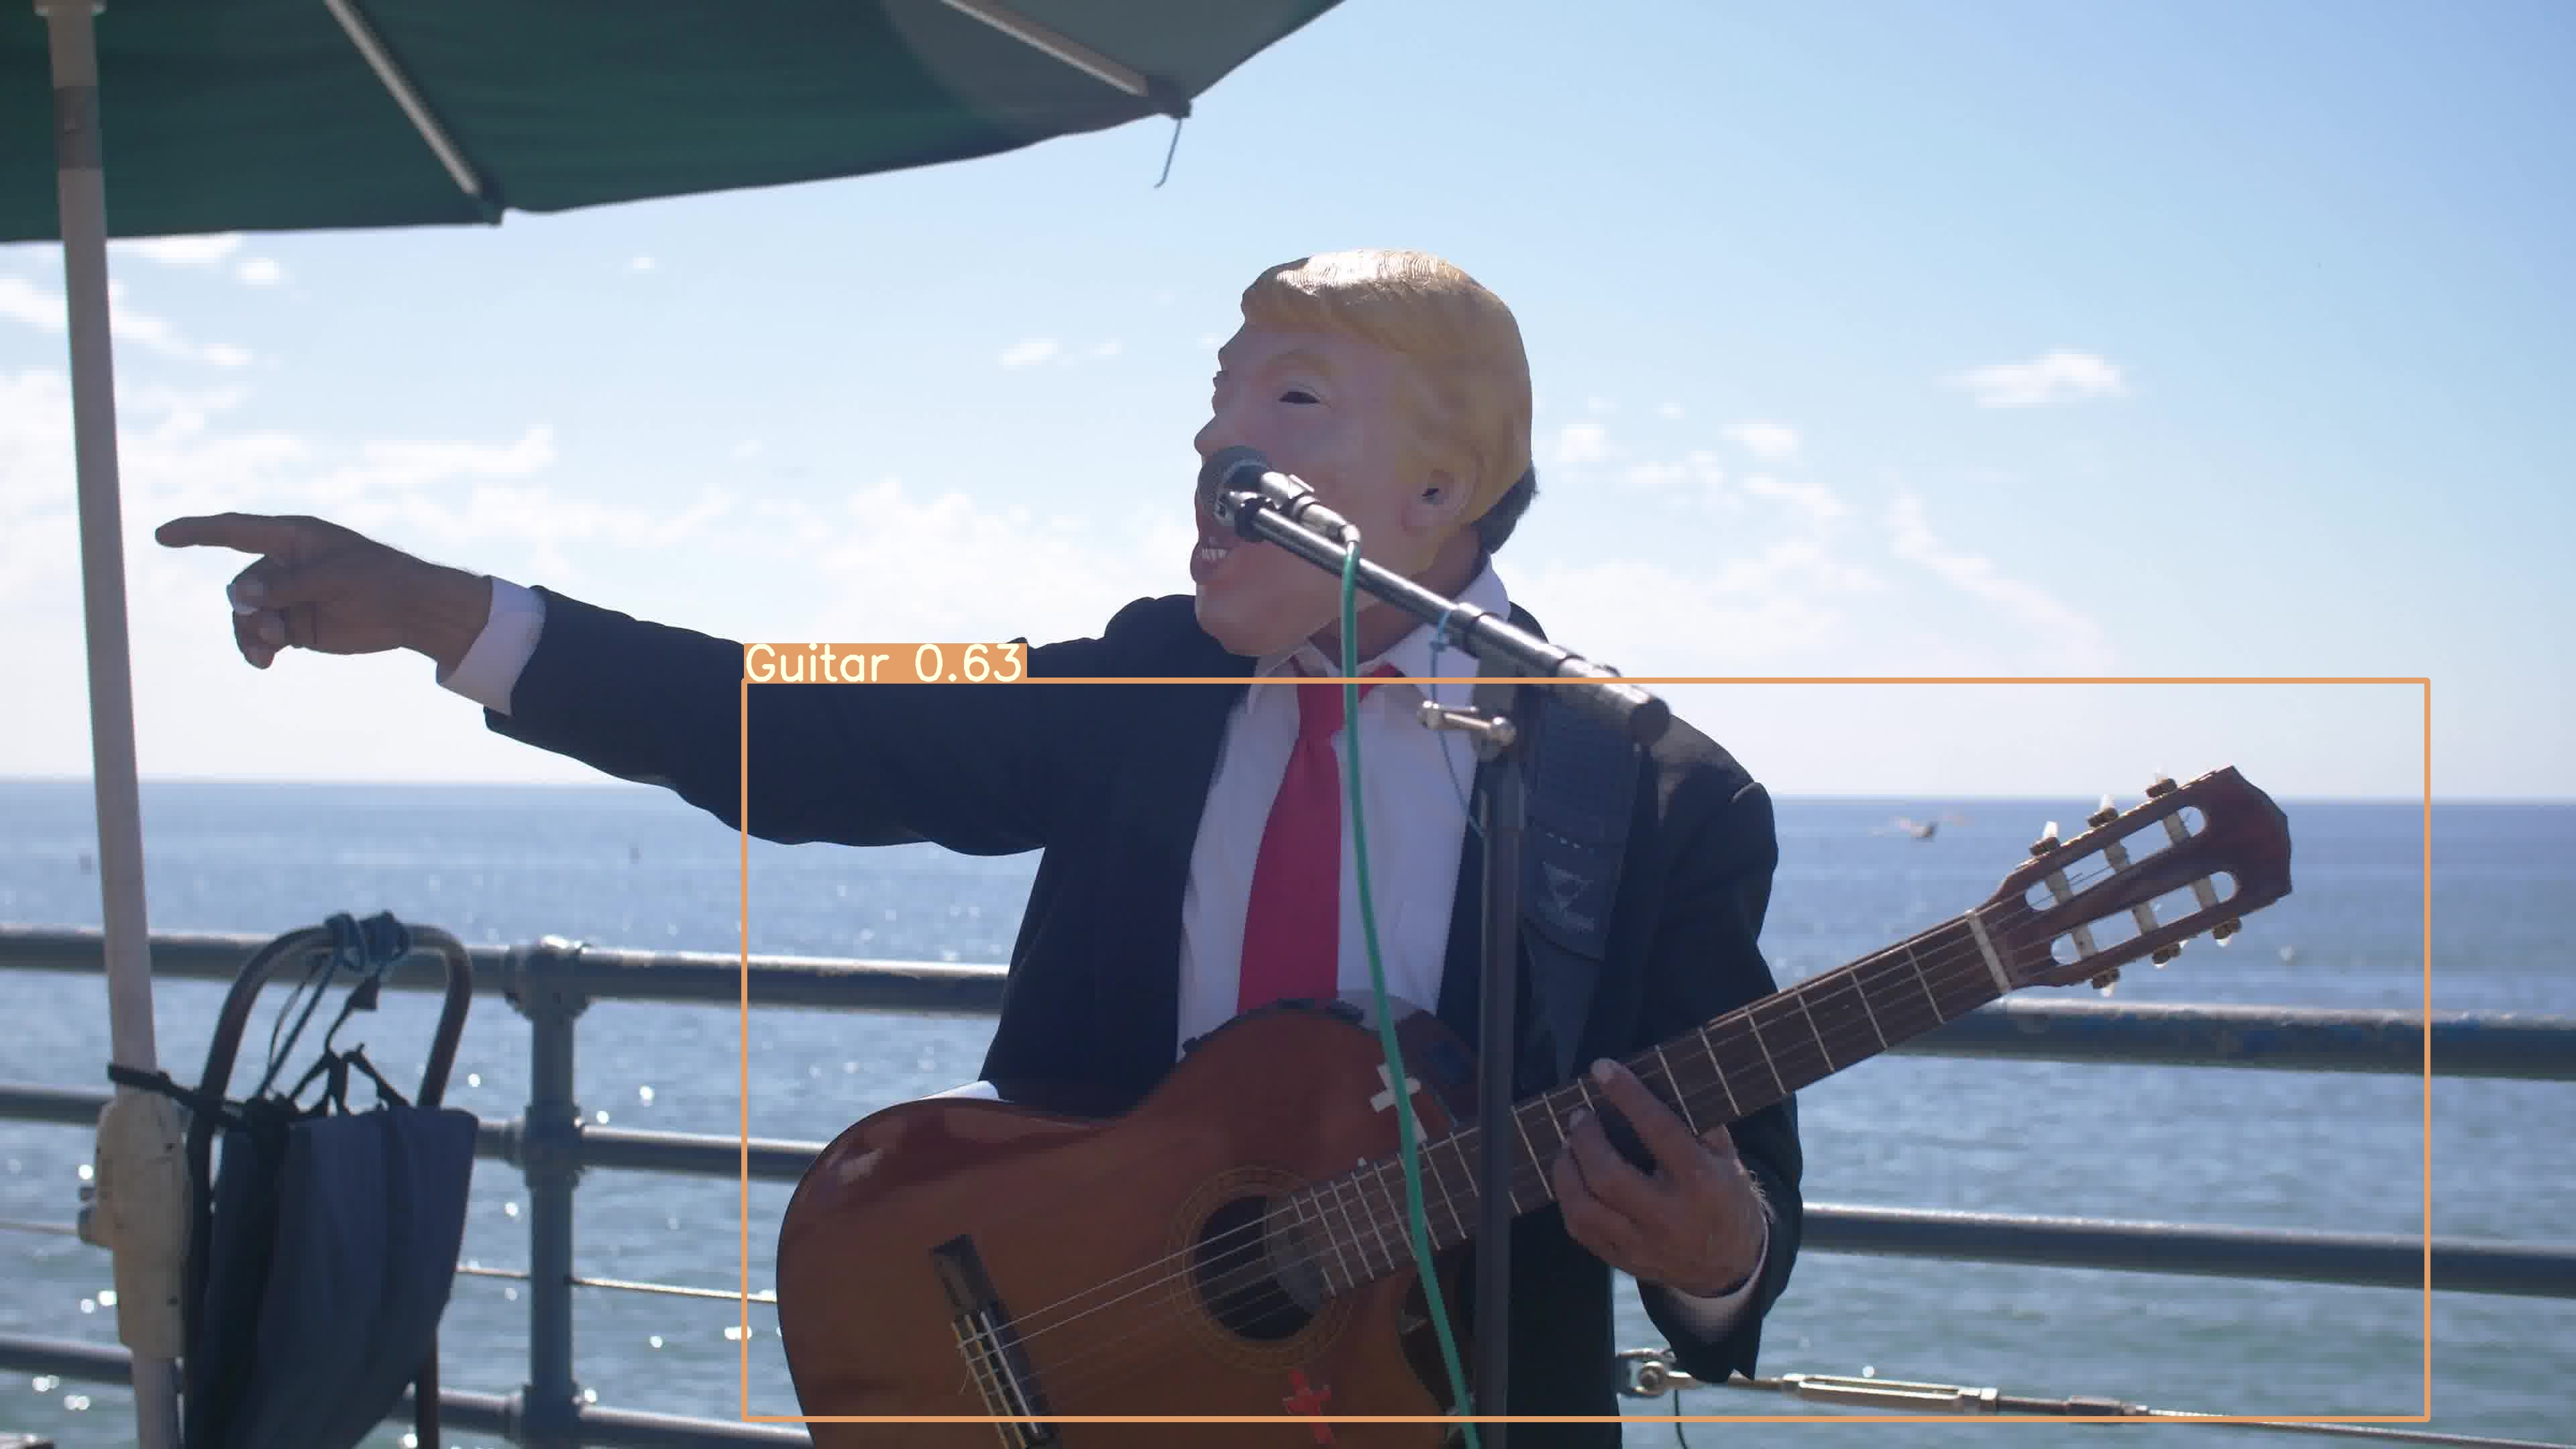

In [ ]:
Image(filename='out_out/image-00443.jpg', width=600)

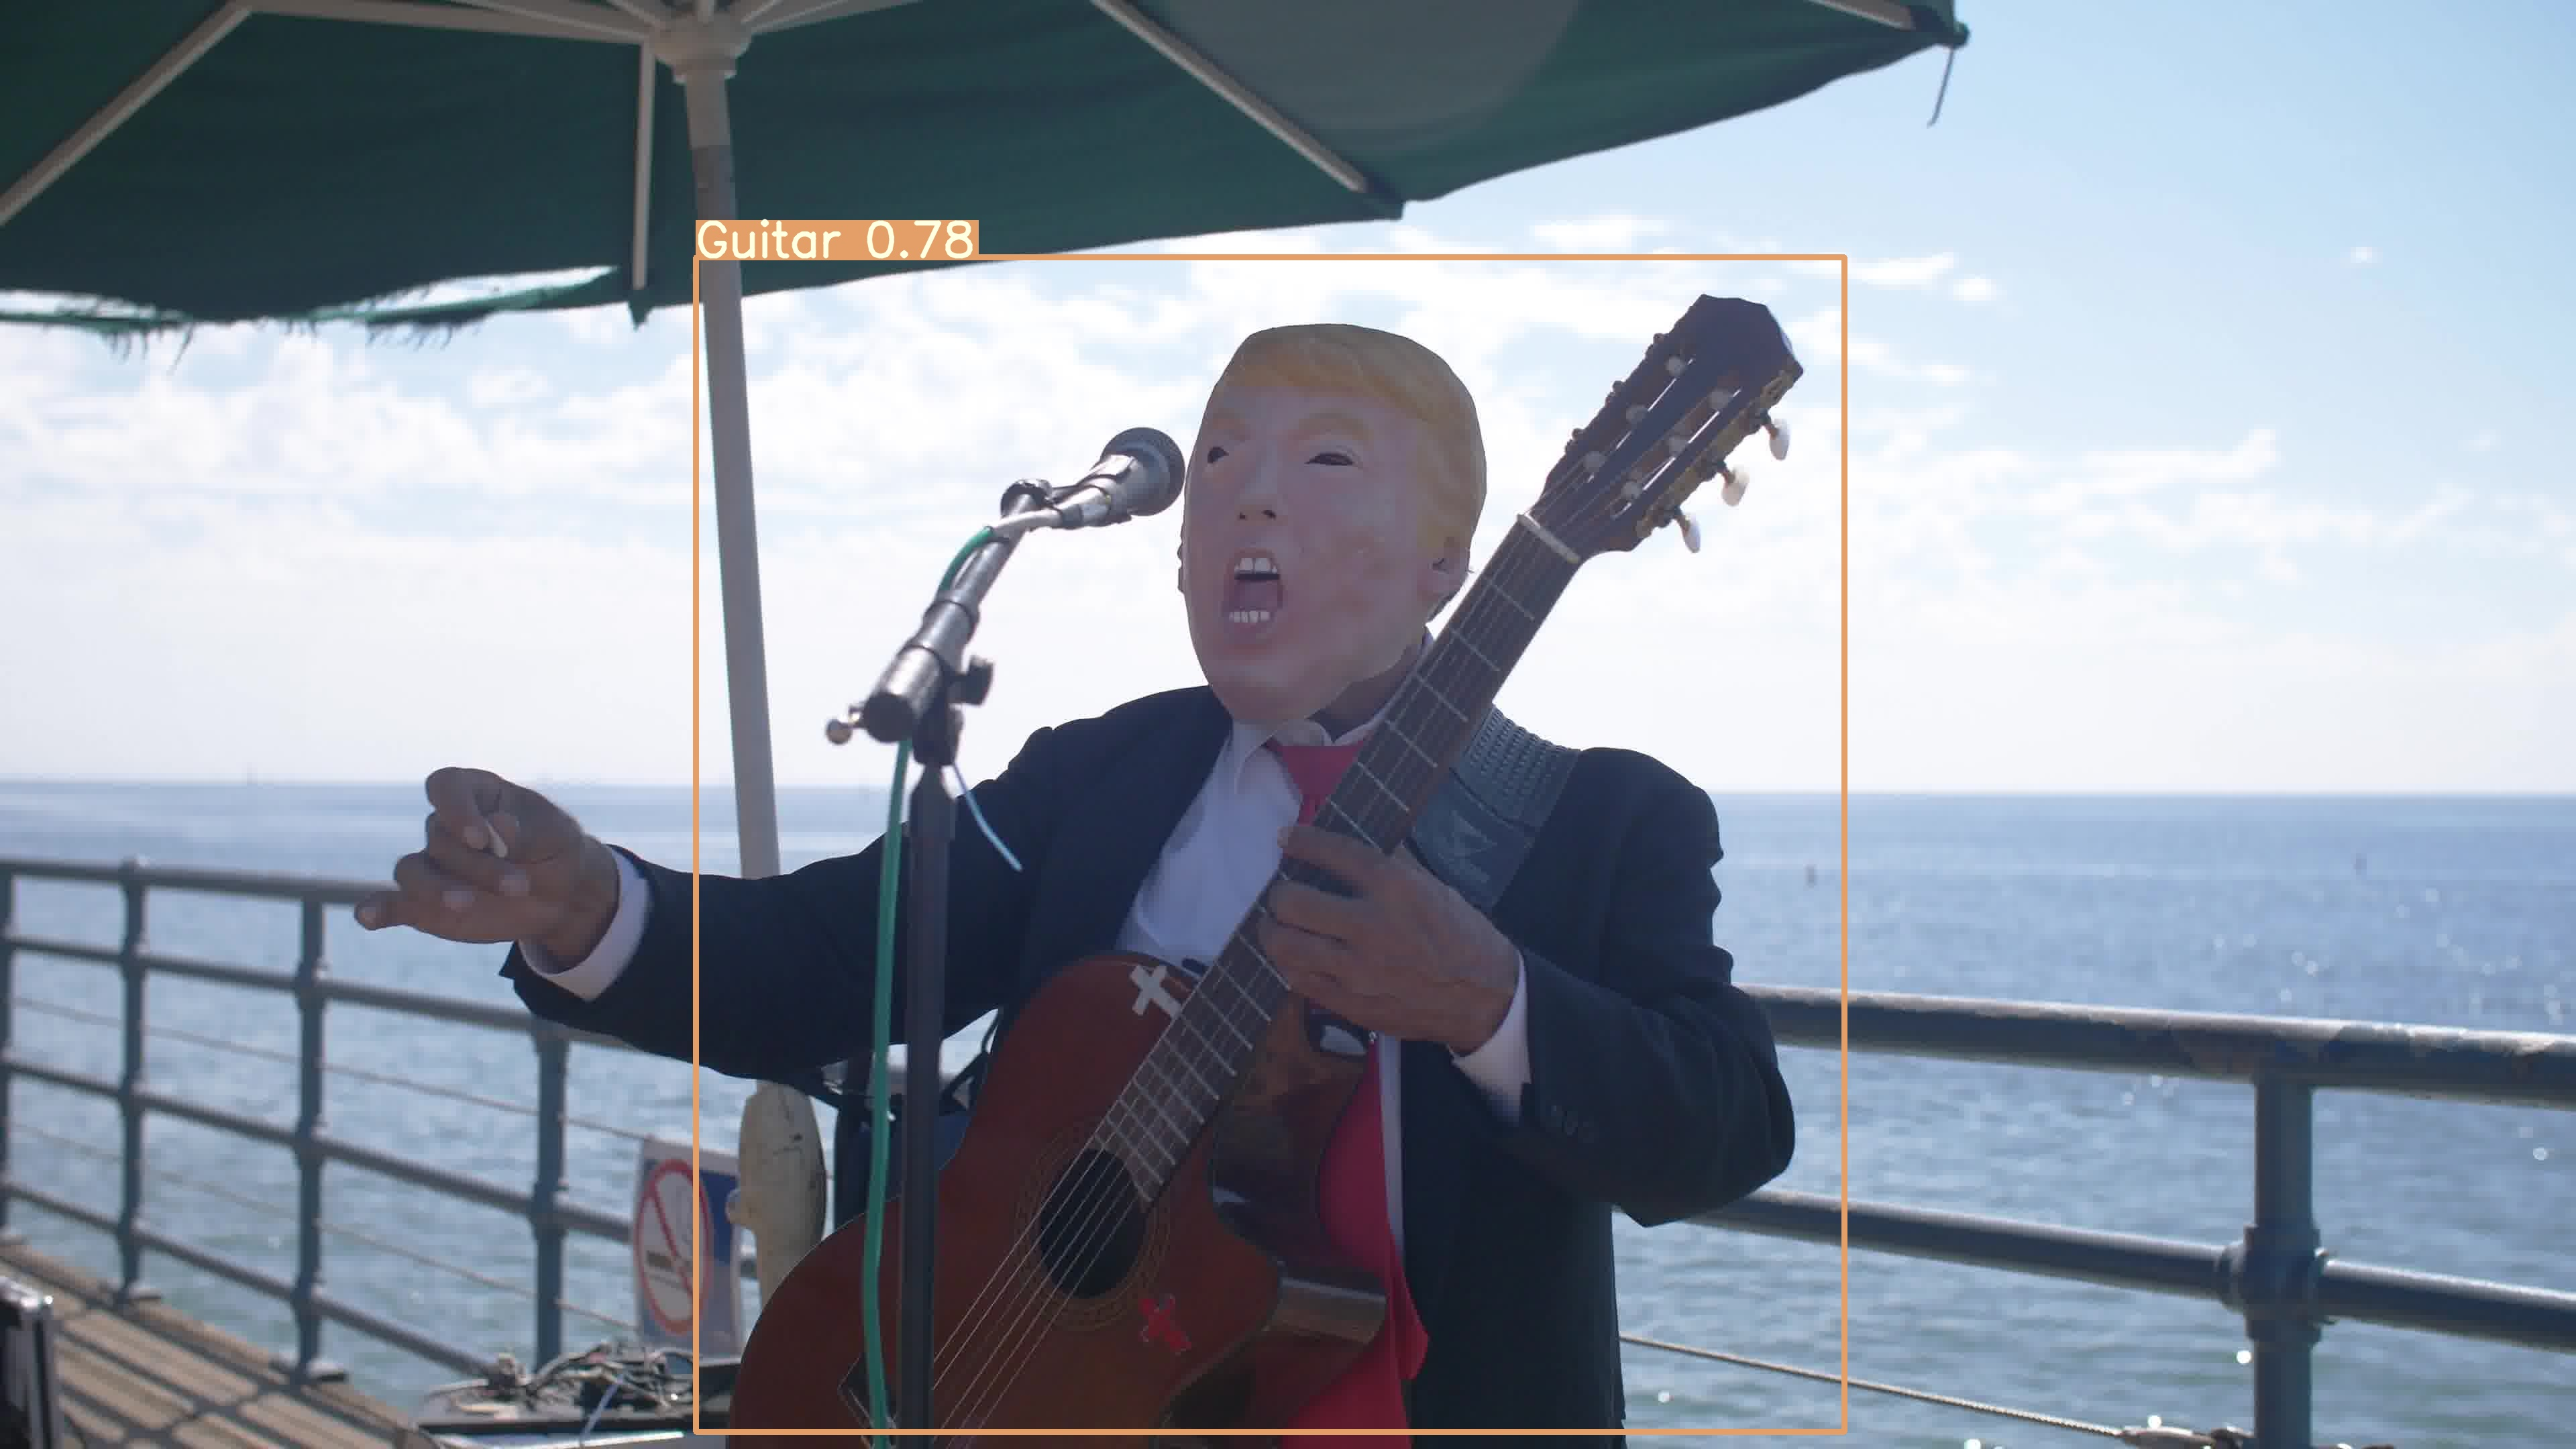

In [ ]:
Image(filename='out_out/image-00709.jpg', width=600)

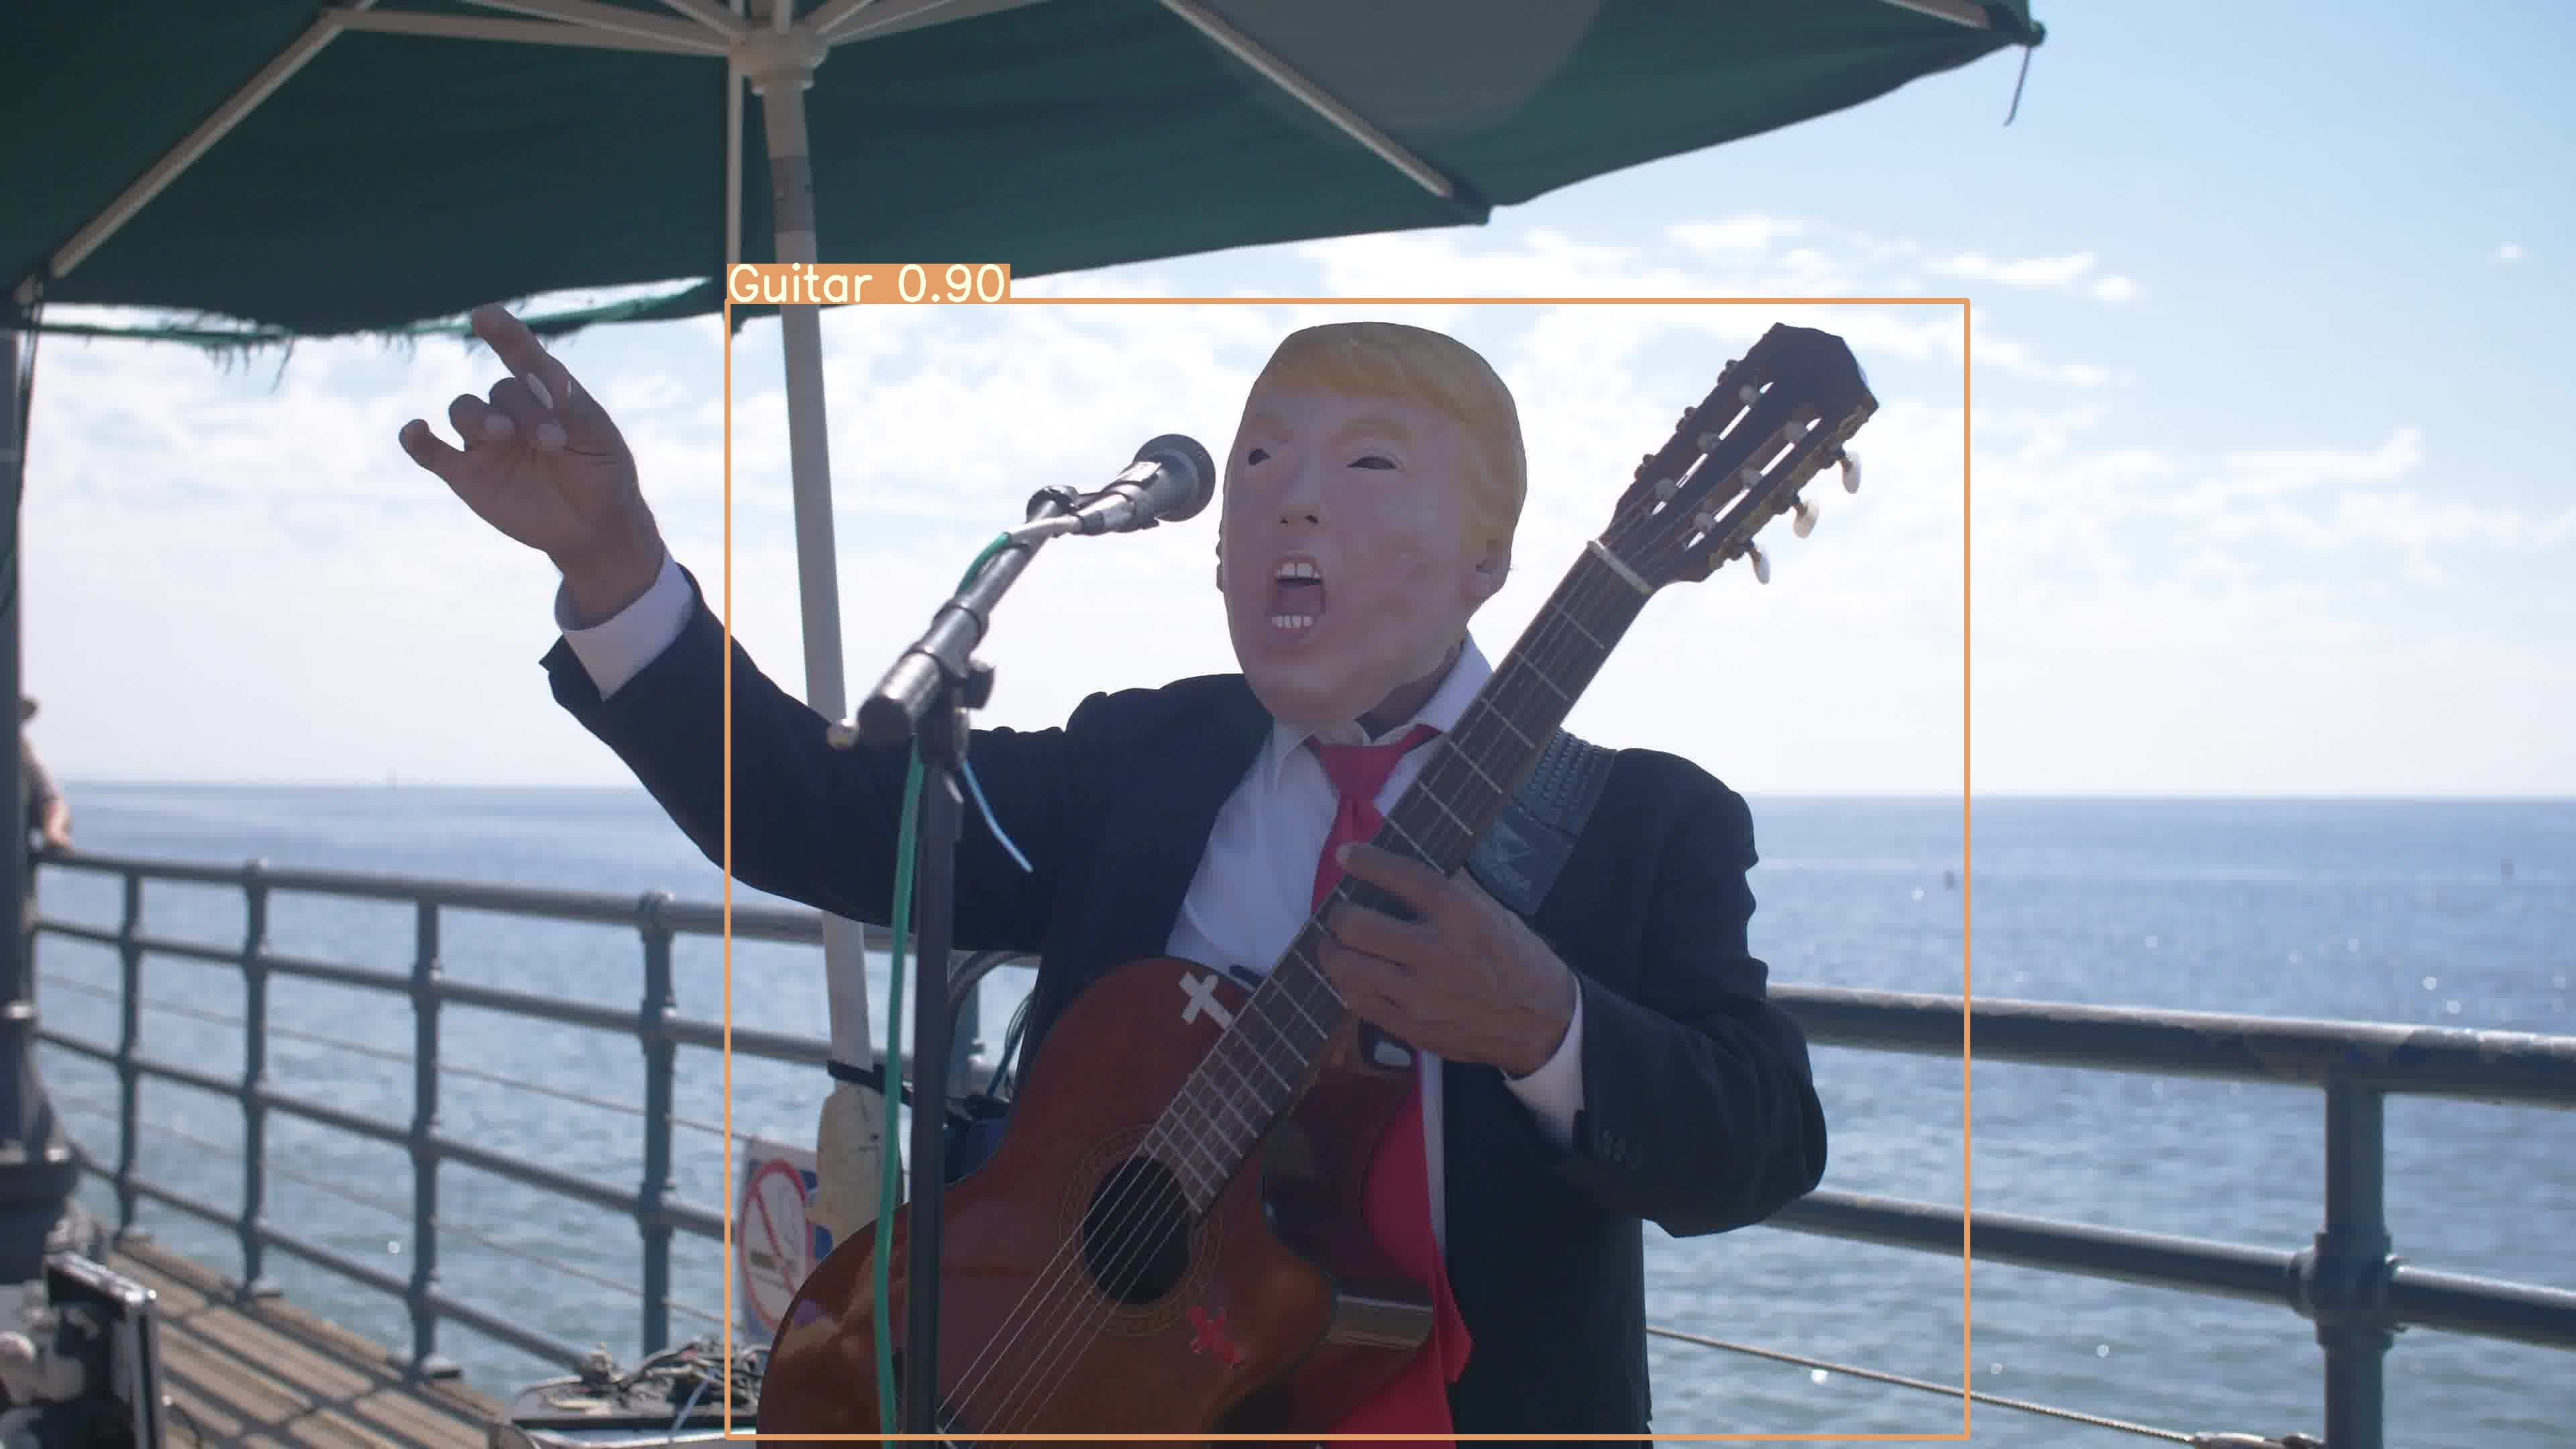

In [ ]:
Image(filename='out_out/image-00721.jpg', width=600)

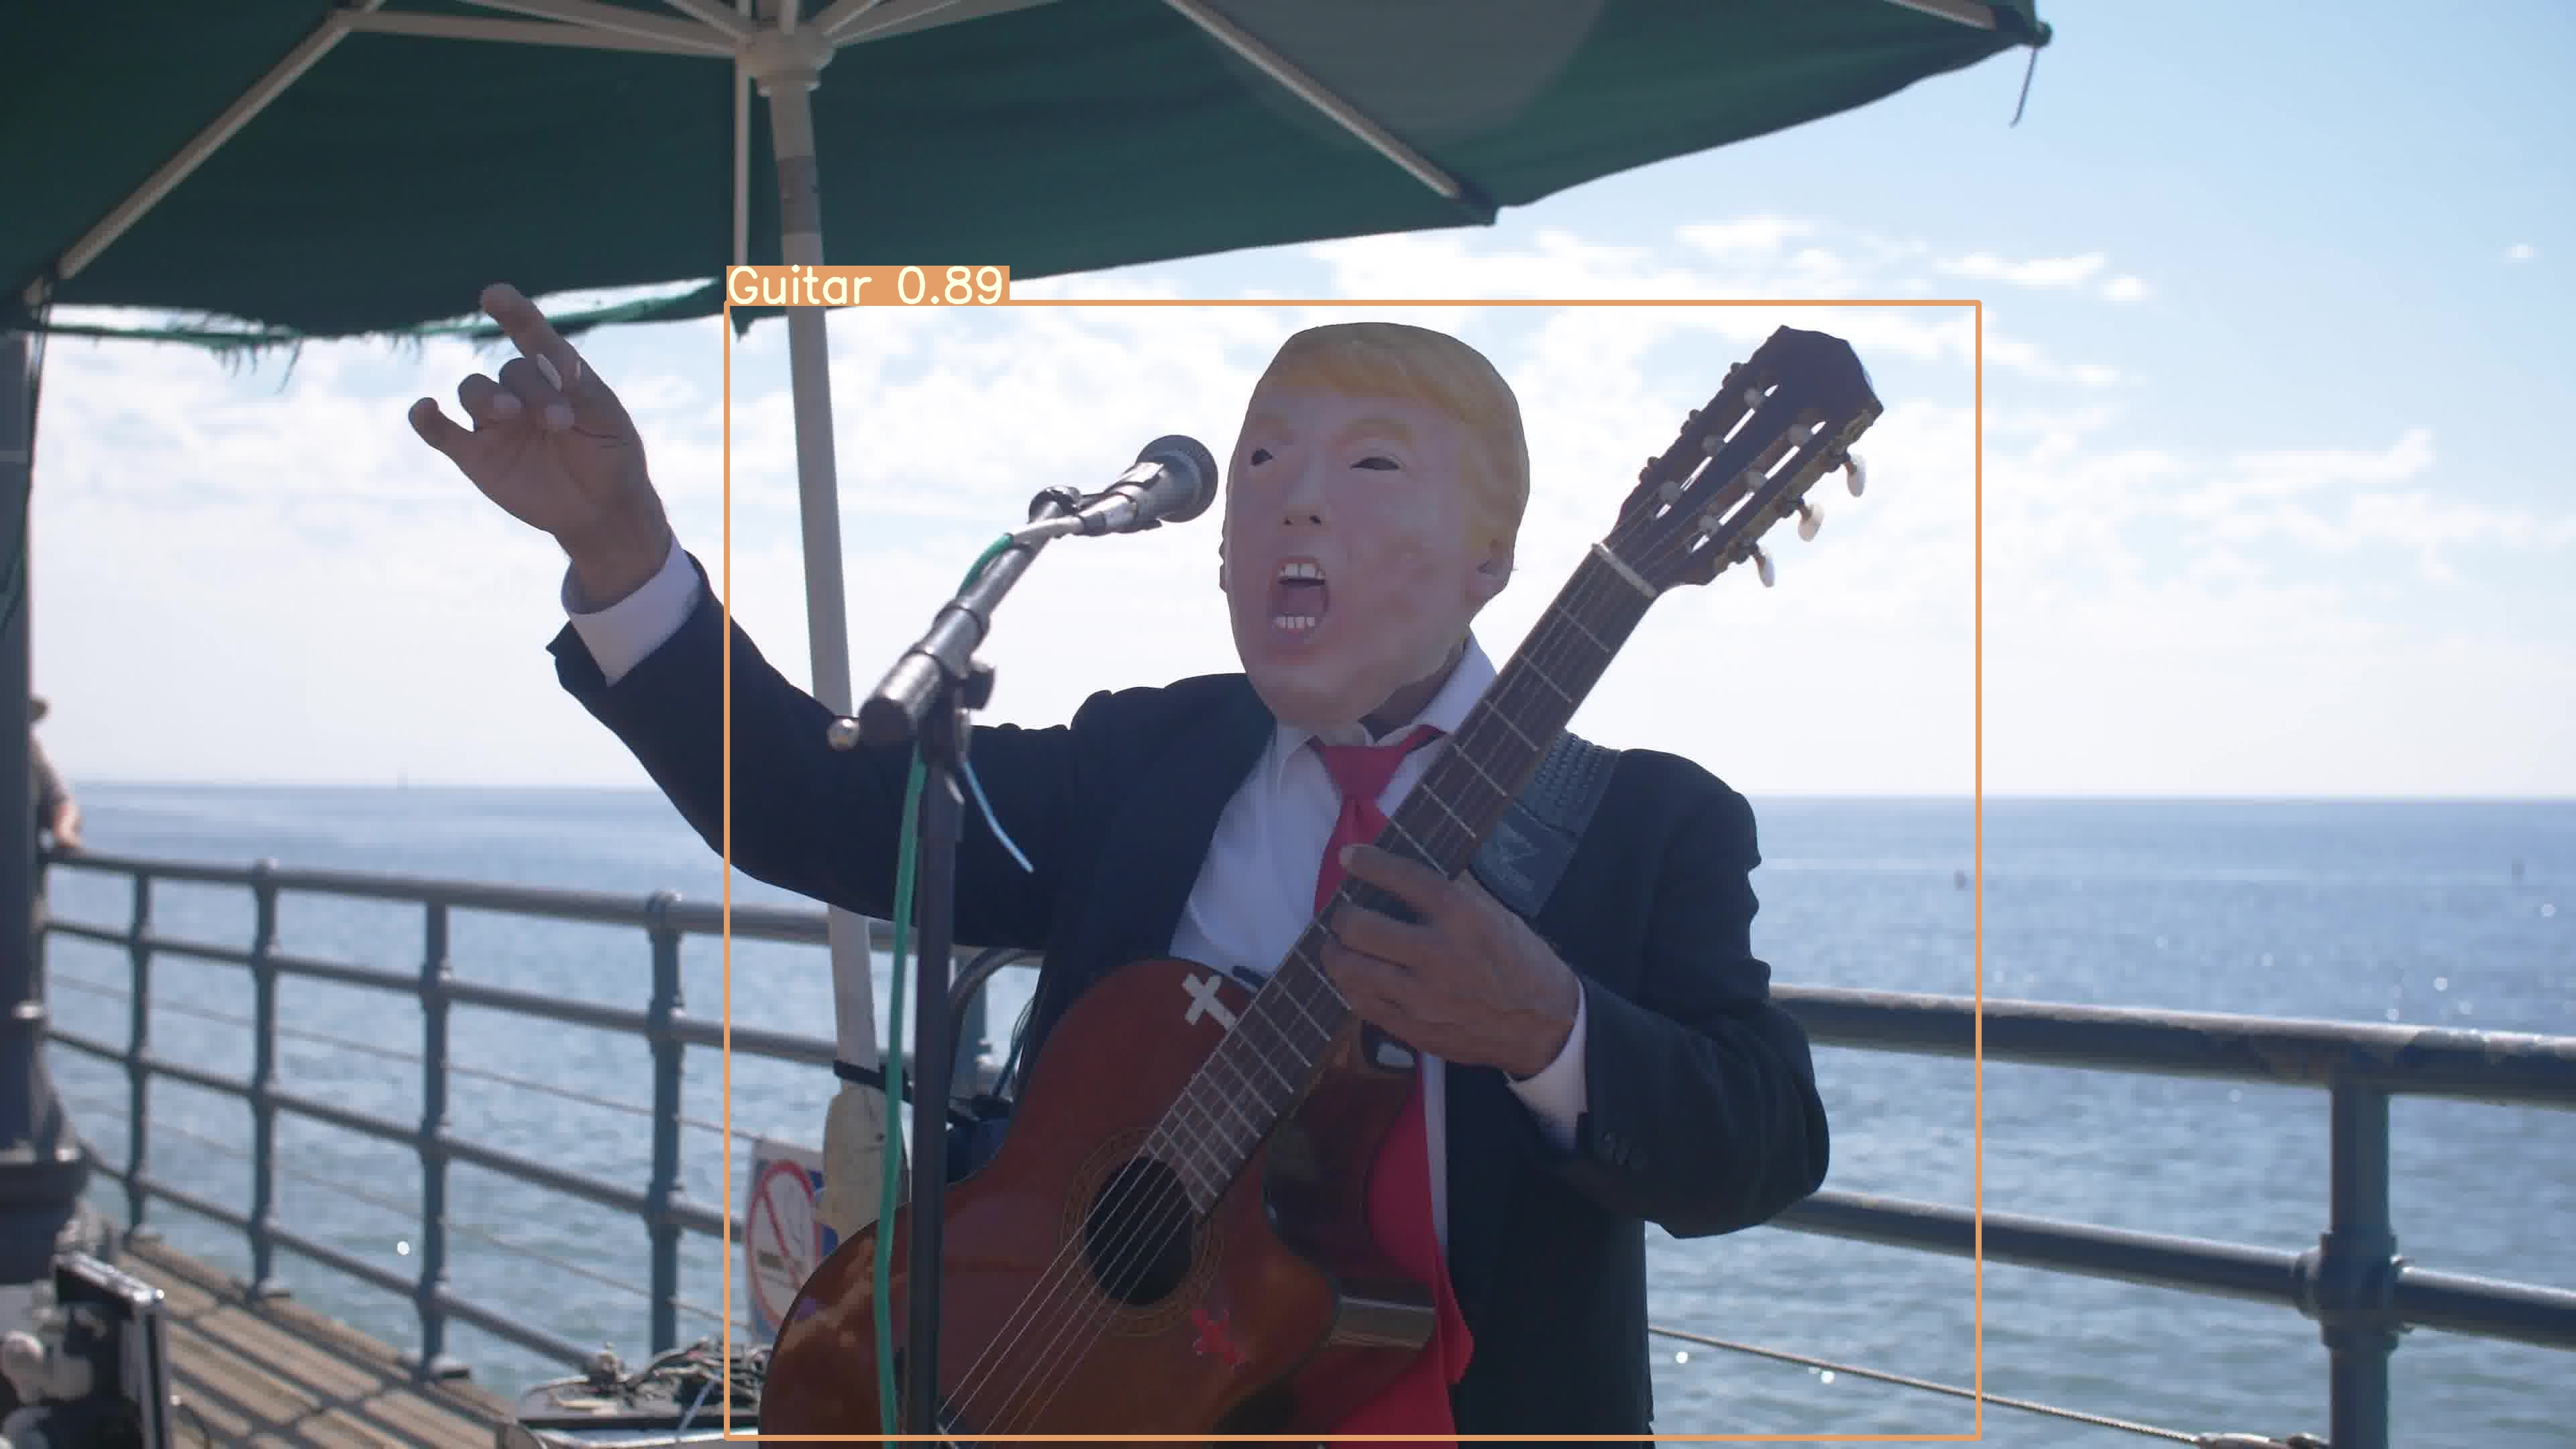

In [ ]:
Image(filename='out_out/image-00722.jpg', width=600)

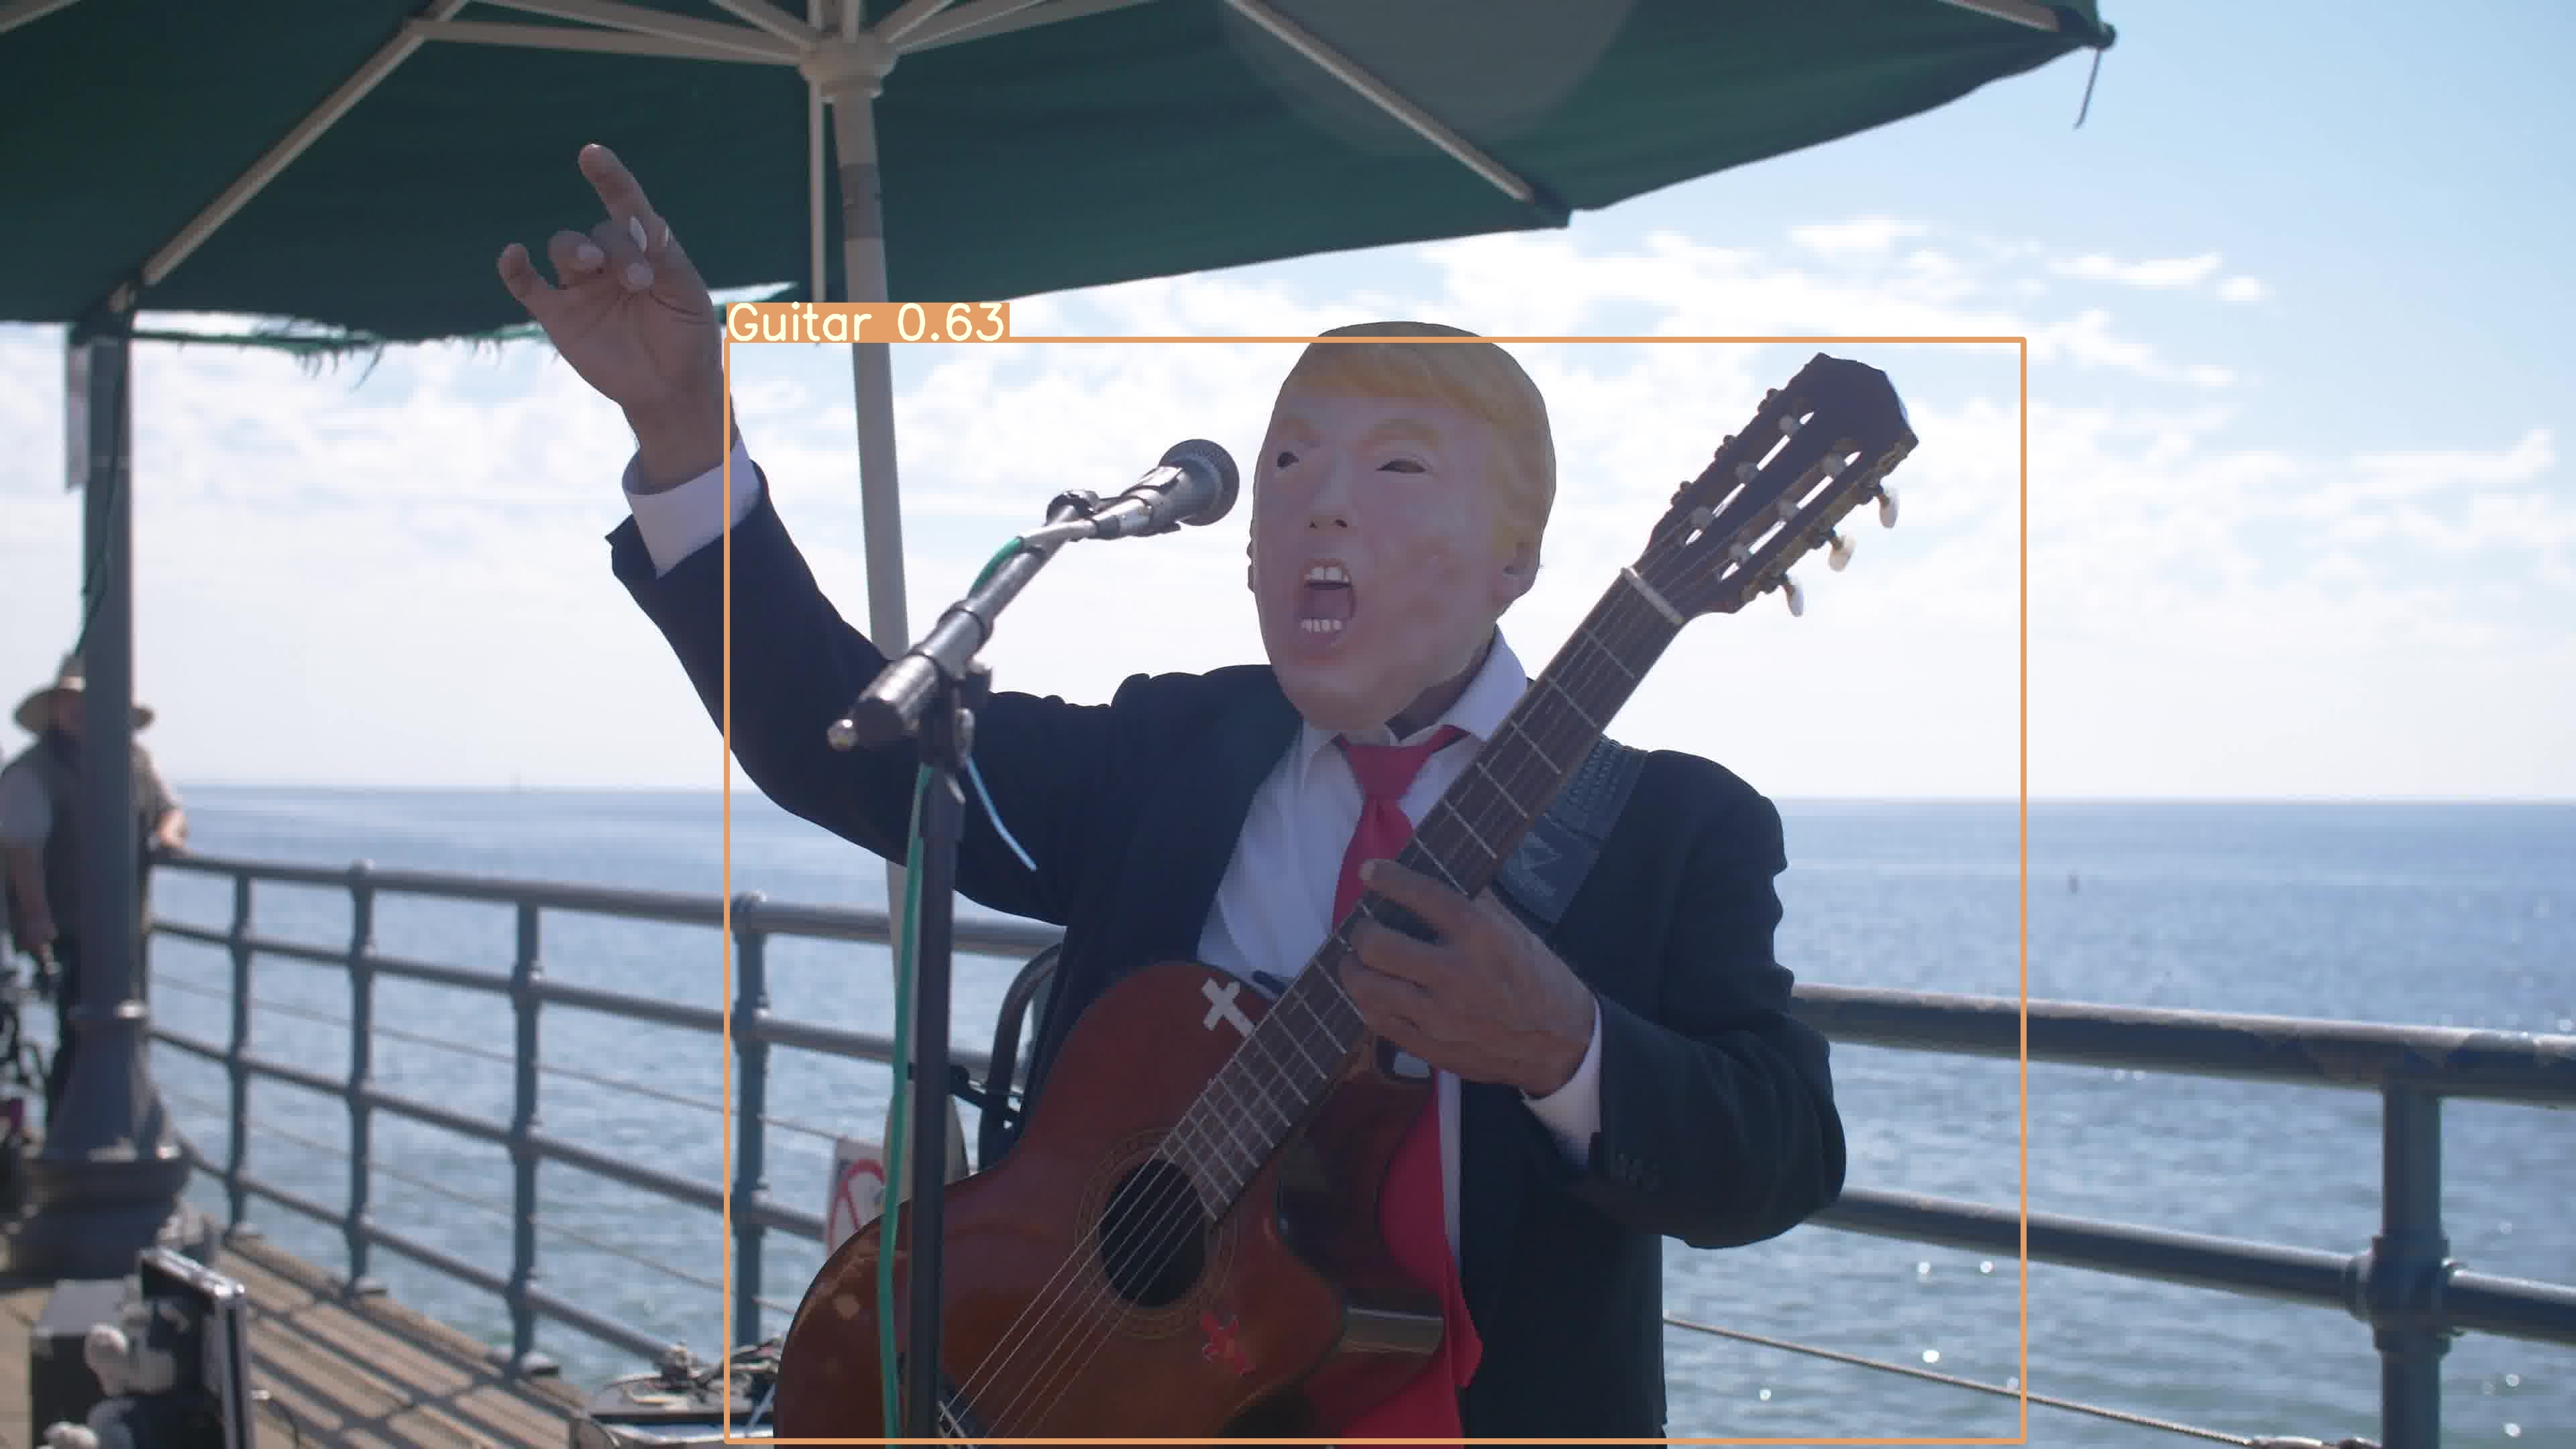

In [ ]:
Image(filename='out_out/image-00735.jpg', width=600)

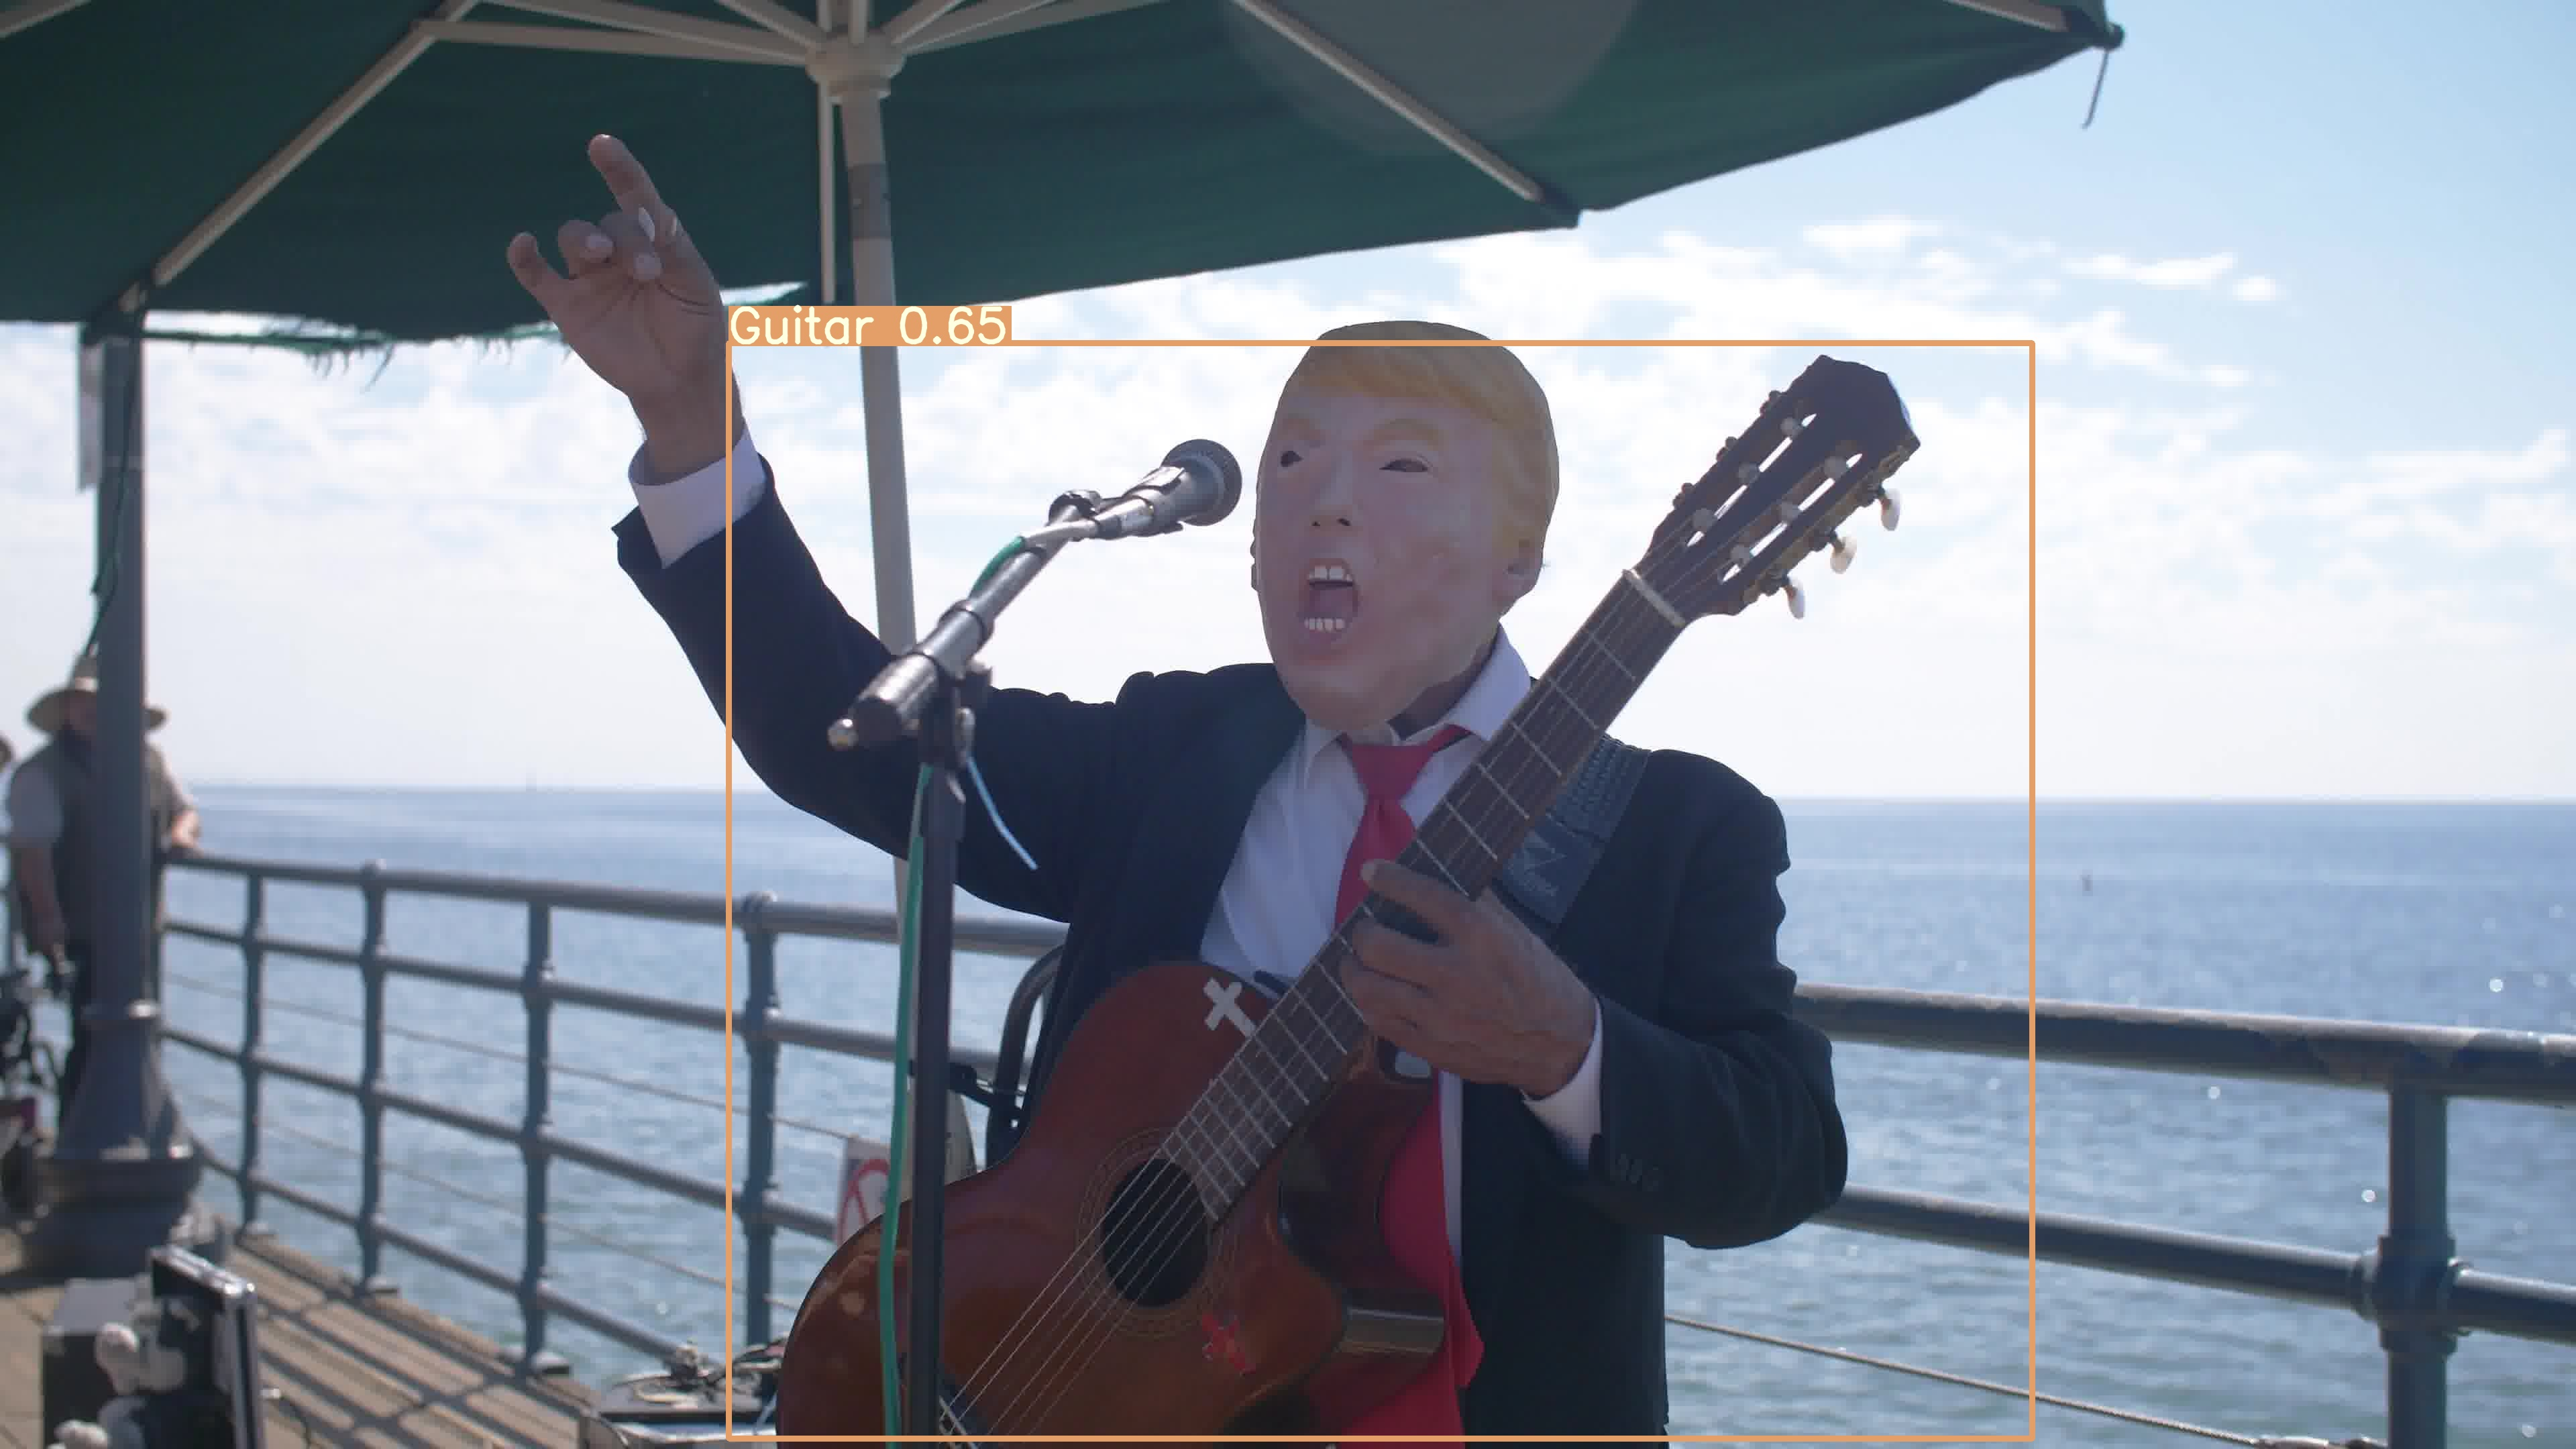

In [ ]:
Image(filename='out_out/image-00737.jpg', width=600)

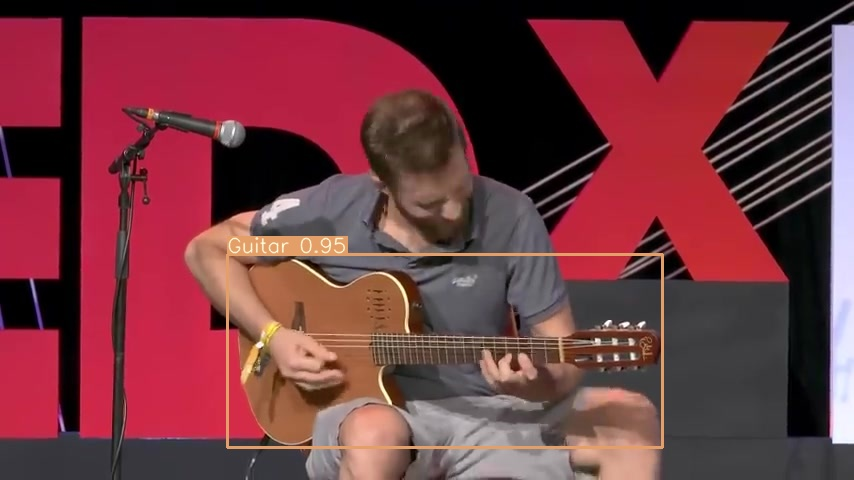

In [ ]:
Image(filename='out_out/image-005.jpg', width=600)

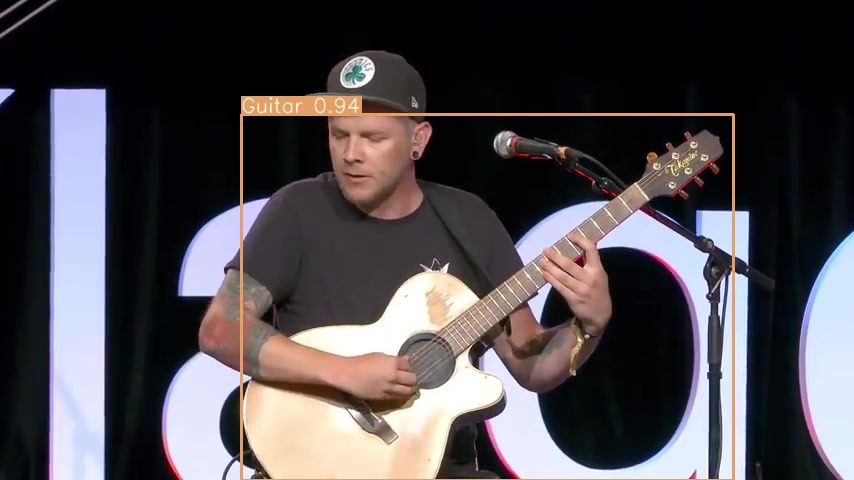

In [ ]:
Image(filename='out_out/image-006.jpg', width=600)

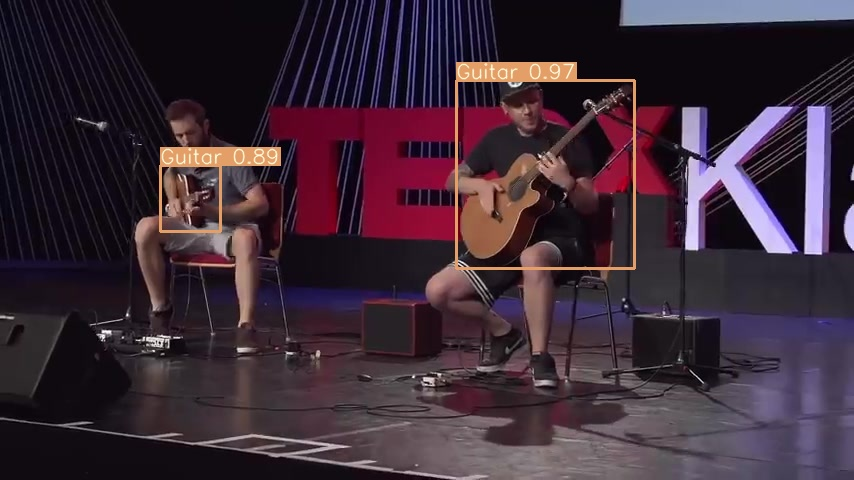

In [ ]:
Image(filename='out_out/image-007.jpg', width=600)

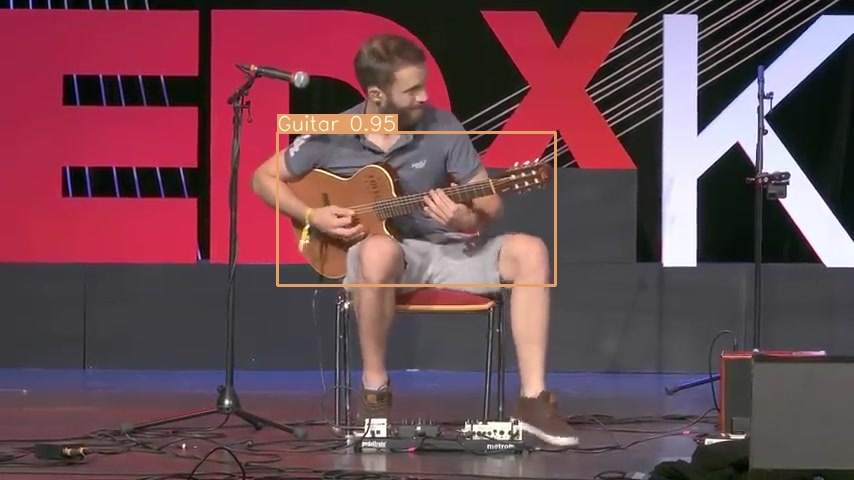

In [ ]:
Image(filename='out_out/image-008.jpg', width=600)

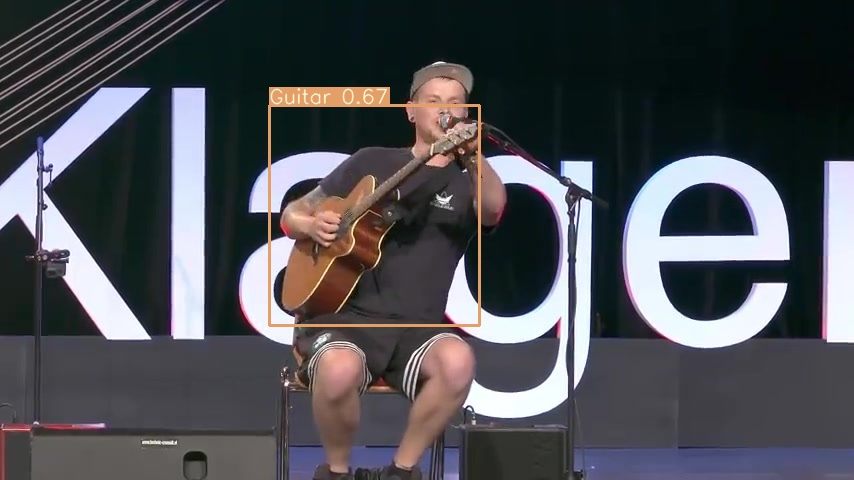

In [ ]:
Image(filename='out_out/image-009.jpg', width=600)

In [ ]:
!gsutil -m cp -r /content/YoloV3/ '/content/gdrive/My Drive/Assignment13/YOLO3'

Copying file:///content/YoloV3/ubdivisions=1...
Copying file:///content/YoloV3/detect.py...
Copying file:///content/YoloV3/test.py...
Copying file:///content/YoloV3/vim.exe.stackdump...
Copying file:///content/YoloV3/test_batch0.png...
Copying file:///content/YoloV3/README.md...
Copying file:///content/YoloV3/train_batch0.png...
Copying file:///content/YoloV3/models.py...
Copying file:///content/YoloV3/ting...
Copying file:///content/YoloV3/train.py...
[Errno 17] File exists: '/content/gdrive/My Drive/Assignment13/YOLO3/YoloV3'
[Errno 17] File exists: '/content/gdrive/My Drive/Assignment13/YOLO3/YoloV3'
[Errno 17] File exists: '/content/gdrive/My Drive/Assignment13/YOLO3/YoloV3'
[Errno 17] File exists: '/content/gdrive/My Drive/Assignment13/YOLO3/YoloV3'
[Errno 17] File exists: '/content/gdrive/My Drive/Assignment13/YOLO3/YoloV3'
[Errno 17] File exists: '/content/gdrive/My Drive/Assignment13/YOLO3/YoloV3'
[Errno 17] File exists: '/content/gdrive/My Drive/Assignment13/YOLO3/YoloV3'
[Err